In [6]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import zipfile
import random
import seaborn as sns
import pandas as pd
from glob import glob
from tensorflow.keras.preprocessing import image

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization, Dropout, Dense, Flatten, MaxPooling2D, Conv2D

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
folder = '/content/drive/Othercomputers/My Computer/Computer vision/projects/dl and cnns/classification digits(mnist)/train.zip'

dir ='./'
zip_ref = zipfile.ZipFile(folder, 'r')
zip_ref.extractall(dir)
zip_ref.close()

In [23]:
train_labels = pd.read_csv('./train.csv', dtype=str)

In [26]:
train_generator = ImageDataGenerator(
    rescale=1/255.,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
).flow_from_dataframe(
    dataframe=train_labels, 
    directory='./Images/train',
    x_col='filename',
    y_col='label',
    batch_size=128,
    class_mode='categorical',
    target_size=(28, 28)
)

Found 49000 validated image filenames belonging to 10 classes.


In [44]:
temp_ = []
for img_name in train_labels.filename:
  img_path = './Images/train/' + img_name
  img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
  img = img.astype('float32')
  temp_.append(img)
train_x = np.stack(temp_)
train_x = train_x/255.
train_x = train_x.reshape(-1, 784).astype('float32')

In [40]:
train_y = tf.keras.utils.to_categorical(train_labels.label.values)

In [49]:
test_csv = pd.read_csv('/content/drive/Othercomputers/My Computer/Computer vision/projects/dl and cnns/classification digits(mnist)/Test.csv', dtype=str)
temp = []
for img_name in test_csv.filename:
  img_path = './Images/test/' + img_name
  img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
  img = img.astype('float32')
  temp.append(img)
test_x = np.stack(temp)
test_x = test_x/255.
test_x = test_x.reshape(-1, 784).astype('float32')
print(test_x.shape)

(21000, 784)


2352


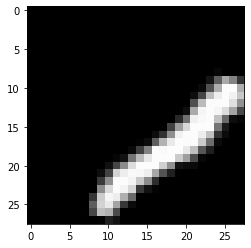

In [46]:
images, labels = train_generator.next()
plt.imshow(images[0])
print(images[0].size)

In [42]:
model_seq = Sequential()
model_seq.add(Dense(512, activation='relu', input_dim=784))
model_seq.add(Dropout(0.2))
model_seq.add(Dense(256, activation='relu'))
model_seq.add(Dropout(0.2))
model_seq.add(Dense(10, activation='softmax'))
model_seq.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_seq.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 512)               401920    
                                                                 
 dropout_10 (Dropout)        (None, 512)               0         
                                                                 
 dense_16 (Dense)            (None, 256)               131328    
                                                                 
 dropout_11 (Dropout)        (None, 256)               0         
                                                                 
 dense_17 (Dense)            (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [47]:
history = model_seq.fit(train_x, train_y, batch_size=128, epochs=5, verbose=1)

Epoch 1/5
383/383 [==============================] - 4s 3ms/step - loss: 0.2860 - accuracy: 0.9135
Epoch 2/5
383/383 [==============================] - 1s 3ms/step - loss: 0.1149 - accuracy: 0.9649
Epoch 3/5
383/383 [==============================] - 1s 3ms/step - loss: 0.0803 - accuracy: 0.9748
Epoch 4/5
383/383 [==============================] - 1s 3ms/step - loss: 0.0623 - accuracy: 0.9798
Epoch 5/5
383/383 [==============================] - 1s 3ms/step - loss: 0.0500 - accuracy: 0.9842


In [50]:
preds = model_seq.predict(test_x)

In [52]:
sample_submission = pd.DataFrame(columns=['filename', 'label'])
sample_submission.filename = test_csv.filename
sample_submission.label = np.argmax(preds, axis=1)
sample_submission.to_csv('test.csv')

In [54]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 32)       128       
 ormalization)                                                   
                                                                 
 dropout_12 (Dropout)        (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)        

In [55]:
model.fit(train_generator, epochs=5, verbose=1)

Epoch 1/5
383/383 [==============================] - 77s 101ms/step - loss: 0.8767 - accuracy: 0.7115
Epoch 2/5
383/383 [==============================] - 36s 93ms/step - loss: 0.4177 - accuracy: 0.8706
Epoch 3/5
383/383 [==============================] - 37s 96ms/step - loss: 0.3225 - accuracy: 0.9014
Epoch 4/5
383/383 [==============================] - 35s 93ms/step - loss: 0.2692 - accuracy: 0.9163
Epoch 5/5
383/383 [==============================] - 37s 95ms/step - loss: 0.2469 - accuracy: 0.9249
